this script calculates distribution of R&D and the distribution of funded paper

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
rd_path='../../data/nf_folder/Data/DerivedData/CleanedRawData/GDEXPRD_OECD.csv'
cntry_fund_frac_path='../../data/nf_folder/Data/DerivedData/Derived/cntry_fund_frac.csv'

In [54]:
output_path='../../data/nf_folder/Figs/funding_rd.pdf'

In [3]:
rd_df=pd.read_csv(rd_path)
rd_df.head()

,Code,WoS,time,indicator,subject,measure,value
0,AUS,Australia,2000,GDEXPRD,TOT,MLN_USD,10689.513545
1,AUS,Australia,2002,GDEXPRD,TOT,MLN_USD,12782.111023
2,AUS,Australia,2004,GDEXPRD,TOT,MLN_USD,14407.180094
3,AUS,Australia,2006,GDEXPRD,TOT,MLN_USD,17803.608913
4,AUS,Australia,2008,GDEXPRD,TOT,MLN_USD,21079.459211


In [4]:
def get_topn_ratio(data_df,timecol,valuecol):
    yearlist=np.arange(2009,2019)
    ranklist=[2,5,10]
    result=[]
    for year in yearlist:
        data_filter=data_df[data_df[timecol]==year]
        data_filter=data_filter.sort_values(by=valuecol,ascending=False)
        for r in ranklist:
            total=data_filter[valuecol].sum()
            topr=data_filter[:r][valuecol].sum()
            topr=topr/total
            result.append([year,r,topr])
    return result

In [5]:
top_rd=get_topn_ratio(rd_df,'time','value')
top_rd=pd.DataFrame(top_rd,columns=['year','topn','rd_ratio'])
top_rd.head()

,year,topn,rd_ratio
0,2009,2,0.482378
1,2009,5,0.713291
2,2009,10,0.851455
3,2010,2,0.479027
4,2010,5,0.703836


In [6]:
cntry_fund_frac=pd.read_csv(cntry_fund_frac_path)
cntry_fund_frac.head()

,fund_cntry,cnt_frac,year,funded,intcol
0,Turkey,1.0,2009,1,0
1,United States,1.0,2009,1,1
2,Russia,1.0,2009,1,0
3,Spain,1.0,2009,1,0
4,Spain,1.0,2009,1,1


In [7]:
cntry_fund_frac=cntry_fund_frac.groupby(['fund_cntry','year'])['cnt_frac'].sum().reset_index()


In [13]:
cntry_fund_frac = cntry_fund_frac[cntry_fund_frac.fund_cntry!='Not-Funded']

In [14]:
top_fund=get_topn_ratio(cntry_fund_frac,'year','cnt_frac')

In [16]:
top_fund_df=pd.DataFrame(top_fund,columns=['year','topn','pub_ratio'])
top_fund_df.head()

,year,topn,pub_ratio
0,2009,2,0.410961
1,2009,5,0.555659
2,2009,10,0.710344
3,2010,2,0.406117
4,2010,5,0.548453


In [18]:
top_meta=top_fund_df.merge(top_rd,on=['year','topn'])
top_meta.head()

,year,topn,pub_ratio,rd_ratio
0,2009,2,0.410961,0.482378
1,2009,5,0.555659,0.713291
2,2009,10,0.710344,0.851455
3,2010,2,0.406117,0.479027
4,2010,5,0.548453,0.703836


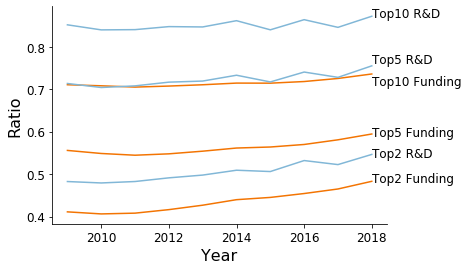

In [55]:
fig,ax=plt.subplots()
sns.lineplot(x='year',y='pub_ratio',data=top_meta,hue='topn',ax=ax,palette=['#F37402']*3,legend=False,dashes=True)
sns.lineplot(x='year',y='rd_ratio',data=top_meta,hue='topn',ax=ax,palette=['#81B7D7']*3,legend=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.text(2018,0.48,'Top2 Funding', fontsize=12)
plt.text(2018,0.54,'Top2 R&D', fontsize=12)
plt.text(2018,0.59,'Top5 Funding', fontsize=12)
plt.text(2018,0.76,'Top5 R&D', fontsize=12)
plt.text(2018,0.71,'Top10 Funding', fontsize=12)
plt.text(2018,0.87,'Top10 R&D', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Year",fontsize=16)
plt.ylabel("Ratio", fontsize=16)
plt.savefig(output_path, bbox_inches='tight')